In [1]:
%matplotlib inline 

import os
import pandas as pd
import xarray as xr
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import matplotlib.lines as mlines

import calendar

import warnings
warnings.simplefilter('error')

name_dicts = {'RASM':{'T2_D': 'Tair',
                      'HFX_D': 'SH',
                      'LH_D': 'LH'},
              'OBS':{'TA': 'Tair',
                     'H': 'SH',
                     'LE': 'LH'},
              }

def plot_percentile_and_mean(x, data, percentiles=(25, 75), ax=None,
                             fill_kwargs={}, plot_kwargs={}):
    """plot percentile and mean"""
    if ax is None:
        ax = plt.gca()
#     p1, p2 = np.nanpercentile(data, percentiles, axis=0)
#     ax.fill_between(x, p1, p2, **fill_kwargs)
    ax.plot(x, np.nanmean(data, axis=0), **plot_kwargs)
    
start = '1994-01-01'
end = '1995-12-31'

# Set some general plotting values
fontsize = 7
dpi = 200 # set to 900 for final publication
mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Myriad Pro') 
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': fontsize})
mpl.rcParams['mathtext.default'] = 'sf'
mpl.rcParams['pdf.fonttype'] = 42

/home/jhamman/anaconda/envs/rasm/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
ds_obs1 = xr.open_dataset('/raid2/jhamman/projects/RASM/data/compare/flux_towers/BOREAS/AMF_CAMan_1994-2008_L2_WG_V001.nc')
ds_obs2 = xr.open_dataset('/raid2/jhamman/projects/RASM/data/compare/flux_towers/Happy_Valley/AMF_USHVa_1994-1995_L2_WG_V002.nc')

In [3]:
dsm = xr.open_dataset('/raid2/jhamman/projects/RASM/data/processed/R1003RBRcaaa01a/atm/monthly_mean_diurnal_cycle/R1003RBRcaaa01a.wrf.hda.nc')

dsm['Rn'] = dsm['GLW_D'] + dsm['SWDNB_D'] - dsm['LWUPB_D'] - dsm['SWUPB_D']

dsm = dsm.rename(name_dicts['RASM'])

In [4]:
dsm['RH'] = 0.263 * dsm['QVAPOR_D'] * dsm['PSFC_D'] * np.power(np.exp((17.67 * (dsm['T_D'] - 273.16)) / (dsm['T_D'] - 29.65)), -1)

In [5]:
site = 'Boreas'
y = 29
x = 179
tzoffset = 6
ds = dsm.isel(south_north=y, west_east=x)[['Rn', 'LH', 'SH', 'Tair', 'RH']]
times = pd.date_range(start='1979-09-01',  freq='MS', periods=dsm.dims['Time'])
hours = np.linspace(0, 24, 8, endpoint=False)

variables = {}
variables['time'] = xr.Variable('time', times)
variables['hour'] = xr.Variable('hour', hours)
shape = (len(variables['time']), len(variables['hour']))

for name in ds.variables:
    print(name)
    try:
        variables[name] = xr.Variable(['time', 'hour'], np.roll(ds[name].values, tzoffset, axis=1))
    except (ValueError, IndexError):
        pass

dsmod = xr.Dataset(data_vars=variables)

dsmod['Tair'] -= 273.15

tinds = np.nonzero((dsmod.indexes['time'] >= start) * (dsmod.indexes['time'] <= end))[0]
dsmod1 = dsmod.isel(time=tinds)

Rn
LH
SH
Tair
RH
south_north
diurnal_cycles
Time
west_east


In [6]:
# site = 'Barrow'
# y = 73
# x = 130
# tzoffset = -3
# ds = dsm.isel(south_north=y, west_east=x)[['Rn', 'LH', 'SH', 'Tair', 'RH']]
# times = pd.date_range(start='1979-09-01',  freq='MS', periods=dsm.dims['Time'])
# hours = np.linspace(0, 24, 8, endpoint=False)

# variables = {}
# variables['time'] = xray.Variable('time', times)
# variables['hour'] = xray.Variable('hour', hours)
# shape = (len(variables['time']), len(variables['hour']))

# for name in ds.variables:
#     print(name)
#     try:
#         variables[name] = xray.Variable(['time', 'hour'], np.roll(ds[name].values, tzoffset, axis=1))
#     except (ValueError, IndexError):
#         pass

# dsmod = xray.Dataset(variables=variables)

# dsmod['Tair'] -= 273.15

# tinds = np.nonzero((dsmod.indexes['time'] >= start) * (dsmod.indexes['time'] <= end))[0]
# dsmod2 = dsmod.isel(time=tinds)

site = 'Happy Valley'
y = 66
x = 132
tzoffset = -3
ds = dsm.isel(south_north=y, west_east=x)[['Rn', 'LH', 'SH', 'Tair', 'RH']]
times = pd.date_range(start='1979-09-01',  freq='MS', periods=dsm.dims['Time'])
hours = np.linspace(0, 24, 8, endpoint=False)

variables = {}
variables['time'] = xr.Variable('time', times)
variables['hour'] = xr.Variable('hour', hours)
shape = (len(variables['time']), len(variables['hour']))

for name in ds.variables:
    print(name)
    try:
        variables[name] = xr.Variable(['time', 'hour'], np.roll(ds[name].values, tzoffset, axis=1))
    except (ValueError, IndexError):
        pass

dsmod = xr.Dataset(data_vars=variables)

dsmod['Tair'] -= 273.15

tinds = np.nonzero((dsmod.indexes['time'] >= start) * (dsmod.indexes['time'] <= end))[0]
dsmod2 = dsmod.isel(time=tinds)

Rn
LH
SH
Tair
RH
south_north
diurnal_cycles
Time
west_east


In [7]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
hours = np.linspace(0, 24, num=8, endpoint=False)

In [8]:
# Get observations data 1
df = ds_obs1.to_dataframe()
for v in df:
    df[v][df[v] == -9999] = np.nan
    df[v][df[v] == -6999] = np.nan

varnames = ['TA', 'H', 'LE', 'Rn', 'RH']
df = df[varnames]
varnames = ['Tair', 'SH', 'LH', 'Rn', 'RH']
df.columns = varnames

df.interpolate(method='linear', limit=3, inplace=True)
df = df.resample('3H', how='mean')

obs_m1 = {}  # mean
obs_x = hours
for v in varnames:
    obs_m1[v] = {}

    for month in months:
        obs_m1[v][month] = np.empty(len(obs_x))
        for i, hour in enumerate(obs_x):
            inds = ((df.index.month == month) * (df.index.hour == hour))
            data = df[v].loc[inds]
            obs_m1[v][month][i] = data.mean()
   

In [9]:
# Get observations data 2
df = ds_obs2.to_dataframe()
for v in df:
    df[v][df[v] == -9999] = np.nan
    df[v][df[v] == -6999] = np.nan

varnames = ['TA', 'H', 'LE', 'Rn', 'RH']
df = df[varnames]
varnames = ['Tair', 'SH', 'LH', 'Rn', 'RH']
df.columns = varnames

df.interpolate(method='linear', limit=3, inplace=True)
df = df.resample('3H', how='mean')

obs_m2 = {}  # mean
obs_x = hours
for v in varnames:
    obs_m2[v] = {}

    for month in months:
        obs_m2[v][month] = np.empty(len(obs_x))
        for i, hour in enumerate(obs_x):
            inds = ((df.index.month == month) * (df.index.hour == hour))
            data = df[v].loc[inds]
            obs_m2[v][month][i] = data.mean()



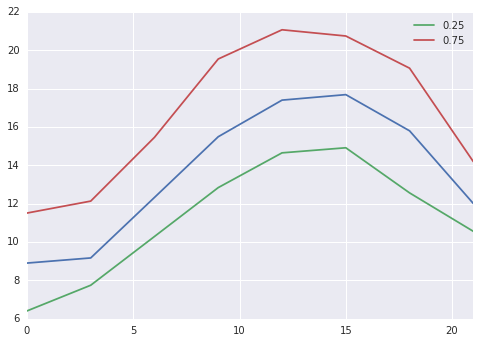

In [10]:
gb = df.ix[df.index.month == 7].groupby(lambda x: x.hour)
ax = gb['Tair'].mean().plot()
gb.quantile([0.25, 0.75])['Tair'].unstack().plot(ax=ax)

In [12]:
mod_m1 = {}  # mean
mod_x = dsmod1['hour'].values
for v in varnames:
    mod_m1[v] = {}

    for month in months:
        mod_m1[v][month] = np.empty(len(mod_x))

        for i, hour in enumerate(mod_x):
            inds = np.nonzero(dsmod1.indexes['time'].month == month)[0]
            data = dsmod1[v].isel(time=inds, hour=i)
            mod_m1[v][month][i] = data.mean()


mod_m2 = {}  # mean
mod_x = dsmod1['hour'].values
for v in varnames:
    mod_m2[v] = {}

    for month in months:
        mod_m2[v][month] = np.empty(len(mod_x))
        for i, hour in enumerate(mod_x):
            inds = np.nonzero(dsmod2.indexes['time'].month == month)[0]
            data = dsmod2[v].isel(time=inds, hour=i)
            mod_m2[v][month][i] = data.mean()


July


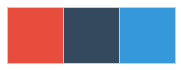

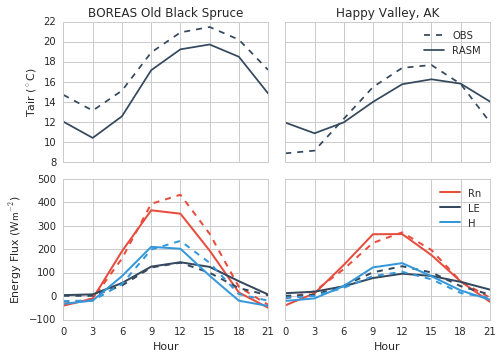

In [13]:
sns.set_style("whitegrid")
# Make more compact plot
month = 7
energy_vars = ['Rn', 'LH', 'SH']
energy_labels = ['Rn', 'LE', 'H']
line_type = ['-', '--', '-.']
marker = ['', '', '']
colors = ["#e74c3c", "#34495e", "#3498db"]
sns.palplot(colors)

temp_vars = ['Tair']

titles = ['BOREAS Old Black Spruce', 'Happy Valley, AK']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', squeeze=False, figsize=(7, 5))
    
for i, (obs, mod) in enumerate([(obs_m1, mod_m1), (obs_m2, mod_m2)]):  
    # Energy Vars
    ax = axes[1, i]
    ax.set_xlabel('Hour')
    plt.sca(ax)
    for j, var in enumerate(energy_vars):
        plt.plot(obs_x, obs[var][month], color=colors[j], linestyle='--', marker=marker[j], linewidth=2)
        plt.plot(mod_x, mod[var][month], color=colors[j], linestyle='-', marker=marker[j], linewidth=2, label=energy_labels[j])

    ax.set_xlim(0, 21)
    ax.set_xticks(obs_x)
    if i == 0:
        ax.set_ylabel('Energy Flux (%s)' % '$W m^{-2}$')
    # Temp Vars
    ax = axes[0, i]
    plt.sca(ax)
    ax.set_title(titles[i])
    for var in temp_vars:
        plt.plot(obs_x, obs[var][month], color=colors[1], linestyle='--', marker=marker[j], label='OBS')
        plt.plot(mod_x, mod[var][month], color=colors[1], marker=marker[j], label='RASM')
        
    ax.set_xlim(0, 21)
    ax.set_xticks(obs_x)
    if i == 0:
        ax.set_ylabel('Tair (%s)' % '$^\circ$C')

plt.tight_layout()
print(calendar.month_name[month])

axes[0, 1].legend()
axes[1, 1].legend()
# fig.savefig('rasm1_plot_dc_july.pdf', dpi=dpi, bbox_inches='tight')
# fig.savefig(os.path.join(os.environ['FTP'], 'RASM_land_surface_climate_figures', 'Figure_11.pdf'), dpi=dpi, bbox_inches='tight')

July


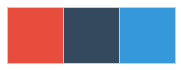

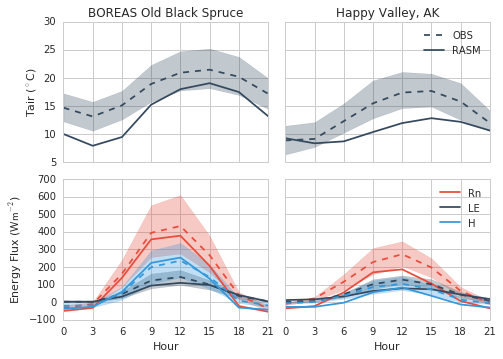

In [37]:
sns.set_style("whitegrid")
# Make more compact plot
month = 7
energy_vars = ['Rn', 'LH', 'SH']
energy_labels = ['Rn', 'LE', 'H']
line_type = ['-', '--', '-.']
marker = ['', '', '']
colors = ["#e74c3c", "#34495e", "#3498db"]
sns.palplot(colors)

temp_vars = ['Tair']

titles = ['BOREAS Old Black Spruce', 'Happy Valley, AK']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', squeeze=False, figsize=(7, 5))
    
for i, (obs, mod) in enumerate([(ds_obs1, dsmod1), (ds_obs2, dsmod2)]):  
   
    df = obs.to_dataframe()
    varnames = ['TA', 'H', 'LE', 'Rn', 'RH']
    df = df[varnames]
    varnames = ['Tair', 'SH', 'LH', 'Rn', 'RH']
    df.columns = varnames

    df[df == -9999] = np.nan
    df[df == -6999] = np.nan
    
    df.interpolate(method='linear', limit=3, inplace=True)
    df = df.resample('3H', how='mean')    
      
    gb = df.ix[df.index.month == month].groupby(lambda x: x.hour)
    obs_mean = gb.mean()
    obs_quantiles = gb.quantile([0.25, 0.75]).unstack()
        
    # Air Temp
    ax = axes[0, i]
    ax.set_xlabel('Hour')
    ax.set_title(titles[i])
    plt.sca(ax)
    var = 'Tair'

    ax.fill_between(obs_quantiles.index, obs_quantiles[var][0.25], obs_quantiles[var][0.75], color=colors[1], alpha=0.3)
    obs_mean[var].plot(ax=ax, color=colors[1], linestyle='--', marker=marker[j], label='OBS')
    plt.plot(mod_x, mod[var][month], color=colors[1], marker=marker[j], label='RASM')
    ax.set_xlim(0, 21)
    ax.set_xticks(obs_x)
    if i == 0:
        ax.set_ylabel('Tair (%s)' % '$^\circ$C')
        
    # Energy Vars
    ax = axes[1, i]
    ax.set_xlabel('Hour')
    plt.sca(ax)
    
    lines = []
    for j, var in enumerate(energy_vars):
        obs_mean[var].plot(ax=ax, color=colors[j], linestyle='--', marker=marker[j])
        ax.fill_between(obs_quantiles.index, obs_quantiles[var][0.25], obs_quantiles[var][0.75], color=colors[j], alpha=0.3)
        l = plt.plot(mod_x, mod[var][month], color=colors[j], marker=marker[j], label=energy_labels[j])
        lines.append(l[0])

    ax.set_xlim(0, 21)
    ax.set_xticks(obs_x)
    if i == 0:
        ax.set_ylabel('Energy Flux (%s)' % '$W m^{-2}$')

plt.tight_layout()
print(calendar.month_name[month])

axes[0, 1].legend()
axes[1, 1].legend(lines, energy_labels)
# fig.savefig('rasm1_plot_dc_july.pdf', dpi=dpi, bbox_inches='tight')
# fig.savefig(os.path.join(os.environ['FTP'], 'RASM_land_surface_climate_figures', 'Figure_11.pdf'), dpi=dpi, bbox_inches='tight')

In [34]:
l

June


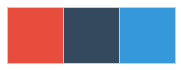

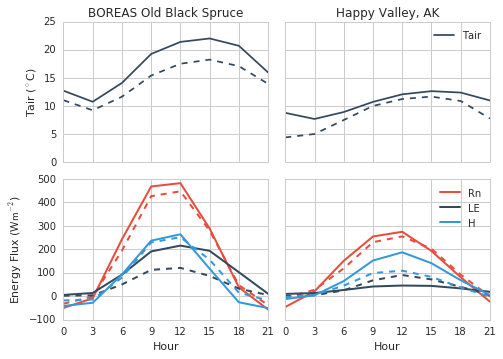

In [24]:
sns.set_style("whitegrid")
# Make more compact plot
month = 6
energy_vars = ['Rn', 'LH', 'SH']
energy_labels = ['Rn', 'LE', 'H']
line_type = ['-', '--', '-.']
marker = ['', '', '']
colors = ["#e74c3c", "#34495e", "#3498db"]
sns.palplot(colors)

temp_vars = ['Tair']

titles = ['BOREAS Old Black Spruce', 'Happy Valley, AK']

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey='row', squeeze=False, figsize=(7, 5))
    
for i, (obs, mod) in enumerate([(obs_m1, mod_m1), (obs_m2, mod_m2)]):  
    # Energy Vars
    ax = axes[1, i]
    ax.set_xlabel('Hour')
    plt.sca(ax)
    for j, var in enumerate(energy_vars):
        plt.plot(obs_x, obs[var][month], color=colors[j], linestyle='--', marker=marker[j], linewidth=2)
        plt.plot(mod_x, mod[var][month], color=colors[j], linestyle='-', marker=marker[j], linewidth=2, label=energy_labels[j])

    ax.set_xlim(0, 21)
    ax.set_xticks(obs_x)
    if i == 0:
        ax.set_ylabel('Energy Flux (%s)' % '$W m^{-2}$')
    # Temp Vars
    ax = axes[0, i]
    plt.sca(ax)
    ax.set_title(titles[i])
    for var in temp_vars:
        plt.plot(obs_x, obs[var][month], color=colors[1], linestyle='--', marker=marker[j], label='OBS')
        plt.plot(mod_x, mod[var][month], color=colors[1], marker=marker[j], label='RASM')
        
    ax.set_xlim(0, 21)
    ax.set_xticks(obs_x)
    if i == 0:
        ax.set_ylabel('Tair (%s)' % '$^\circ$C')

plt.tight_layout()
print(calendar.month_name[month])

axes[0, 1].legend()
axes[1, 1].legend()
fig.savefig('rasm1_plot_dc_june.pdf', dpi=dpi, bbox_inches='tight')


In [ ]:
for i, (obs, mod) in enumerate([(obs_m1, mod_m1), (obs_m2, mod_m2)]):
    if i == 0:
        site = 'BOREAS'
    else:
        site = 'Happy Valley'
    obs_d = {}
    mod_d = {}
    for var in energy_vars:
        obs_save = []
        mod_save = []
        for month in months:
            obs_save.append(obs[var][month].mean())
            mod_save.append(mod[var][month].mean())

        obs_d[var] = obs_save
        mod_d[var] = mod_save

    obs_df = pd.DataFrame(obs_d)
    mod_df = pd.DataFrame(mod_d)

    for df in [obs_df, mod_df]:
        df['closure'] = df['Rn'] - df['SH'] - df['LH']
        df['B'] = df['SH'] / df['LH']
        df.index = months

    print(site, 'model\n', mod_df)
    print(site, 'observations\n', obs_df)